#### Ryan Gilbert
#### CMP 262-56145
#### Final Project - Data Analysis

# Objectives

## Perform whatever aggregate functions are necessary in order to answer at least 2 of 4 required questions. Questions must be written in Markdown cells and the answers must be answered using Python, displaying the result in a plot.



# Import Modules & Cleaned Data Frame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_final = pd.read_csv("df_final.csv")

# Question 1: How do schools with a greater percentage of low-socioeconomic status students perform compared to those with a smaller percentage (using FRL as a measure)?

### '%FRL' = In the Associated Documentation, the value is the 'Percentage of [students who receive] Free or Reduced-Price Lunches'.

### Creating aggregate groups of the '%FRL' students. 

#### Checking to the spread of the data to determine what the values should be to set the 'groups'

In [3]:
df_final["Percent_FRL"].describe()

count    1295.000000
mean       42.566332
std        18.766522
min         0.000000
25%        29.600000
50%        40.400000
75%        53.350000
max       100.000000
Name: Percent_FRL, dtype: float64

In [4]:
df_final["FRL_Group"] = pd.cut(
    df_final["Percent_FRL"],
    bins=[0,29,40,53,100],
    labels=["Low (0-29%)","Moderate (30-40%)","High (41-53%)","Very High (54-100%)"]
)

### Using that new aggregate 'FRL_Group' and the mean of the 'School_index' for those Groups to find out if there is an obvious corelation

In [5]:
mean_index_by_frl = df_final.groupby("FRL_Group")["School_Index"].mean()
# Preview the groups to see if there is an obvious correlation.
print(mean_index_by_frl)

FRL_Group
Low (0-29%)            58.031205
Moderate (30-40%)      56.098742
High (41-53%)          54.605154
Very High (54-100%)    50.873393
Name: School_Index, dtype: float64


/var/folders/lp/b3j3v6gx03g5m31fknpjvk640000gn/T/ipykernel_82013/3135487816.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_index_by_frl = df_final.groupby("FRL_Group")["School_Index"].mean()


## This shows a correlation between the percentage of students who receive Free or Reduced-Price Lunches and the School's Index Score. This information will be presented in a ViolinPlot below.

/var/folders/lp/b3j3v6gx03g5m31fknpjvk640000gn/T/ipykernel_82013/2297607824.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


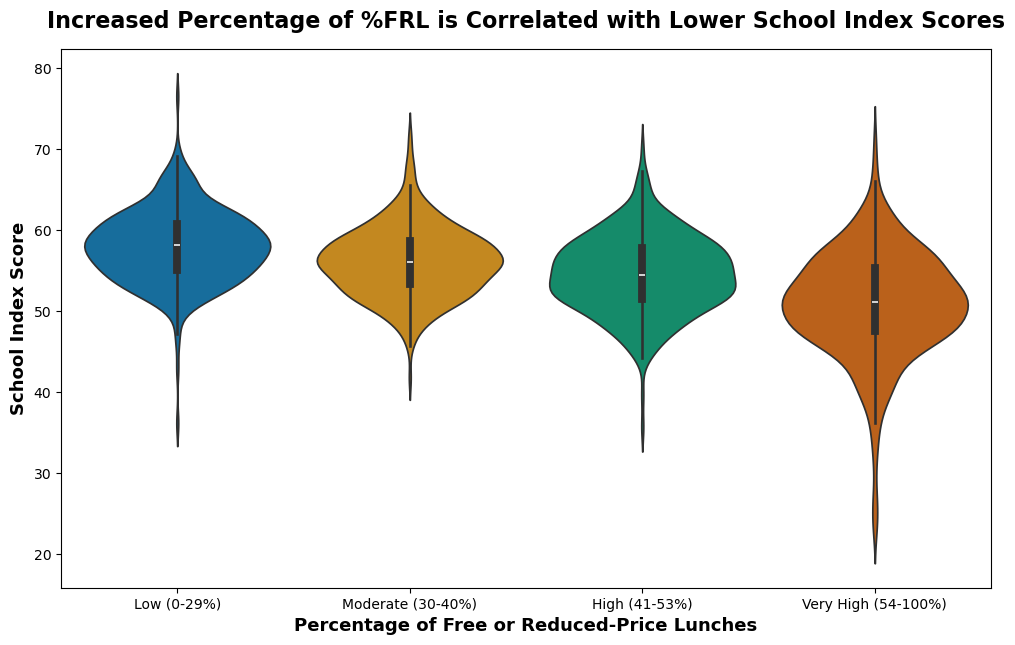

In [6]:
plt.figure(figsize=(12,7))

sns.violinplot(
    data=df_final,
    x="FRL_Group",      
    y="School_Index",    
    order=["Low (0-29%)","Moderate (30-40%)","High (41-53%)","Very High (54-100%)"],
    inner="box",         # shows median and quartiles inside the violin
    palette="colorblind"       
)

plt.title("Increased Percentage of %FRL is Correlated with Lower School Index Scores", fontsize=16, fontweight="bold", pad=15)
plt.xlabel('Percentage of Free or Reduced-Price Lunches', fontsize =13, fontweight="bold")
plt.ylabel("School Index Score", fontsize=13, fontweight="bold")

plt.savefig("percent_frl.png", dpi=300, bbox_inches="tight")

plt.show()

## For these results, it is important to keep in mind that %FRL is a proxy measure and not a direct measure of socioeconomic status of students' families enrolled at schools in the Iowa Public School System.

# Question 2: How do schools with a greater percentage of students having an IEP Plan perform compared to those with a smaller percentage?

### An IEP, or an Individualized Education Plan is created and administered for those students who attend a K-12 school and who have a documented disability.

In [7]:
df_final["Percent_IEP"].describe()

count    1295.000000
mean       13.666795
std         5.692130
min         0.000000
25%        10.750000
50%        13.200000
75%        16.000000
max       100.000000
Name: Percent_IEP, dtype: float64

### For this group, the groups will be set to: '0-10%', '10-13%', '13-16%', and '16%+'

In [8]:
df_final["IEP_Group"] = pd.cut(
    df_final["Percent_IEP"],
    bins=[0,10,13,16,100],
    labels=["Low (0-10%)","Moderate (11-13%)","High (14-16%)","Very High (16-100%)"]
)

In [9]:
mean_index_by_iep = df_final.groupby("IEP_Group")["School_Index"].mean()
# Preview the groups to see if there is an obvious correlation.
print(mean_index_by_iep)

IEP_Group
Low (0-10%)            56.313713
Moderate (11-13%)      55.559532
High (14-16%)          54.930471
Very High (16-100%)    52.743820
Name: School_Index, dtype: float64


/var/folders/lp/b3j3v6gx03g5m31fknpjvk640000gn/T/ipykernel_82013/3858291607.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_index_by_iep = df_final.groupby("IEP_Group")["School_Index"].mean()


### There does seem to be a correlation between the percentage of students attending a school who have an IEP and that school's performance, but it is lesser than that of lower socioeconomic status, measured originally using %FRP.

/var/folders/lp/b3j3v6gx03g5m31fknpjvk640000gn/T/ipykernel_82013/2169670511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


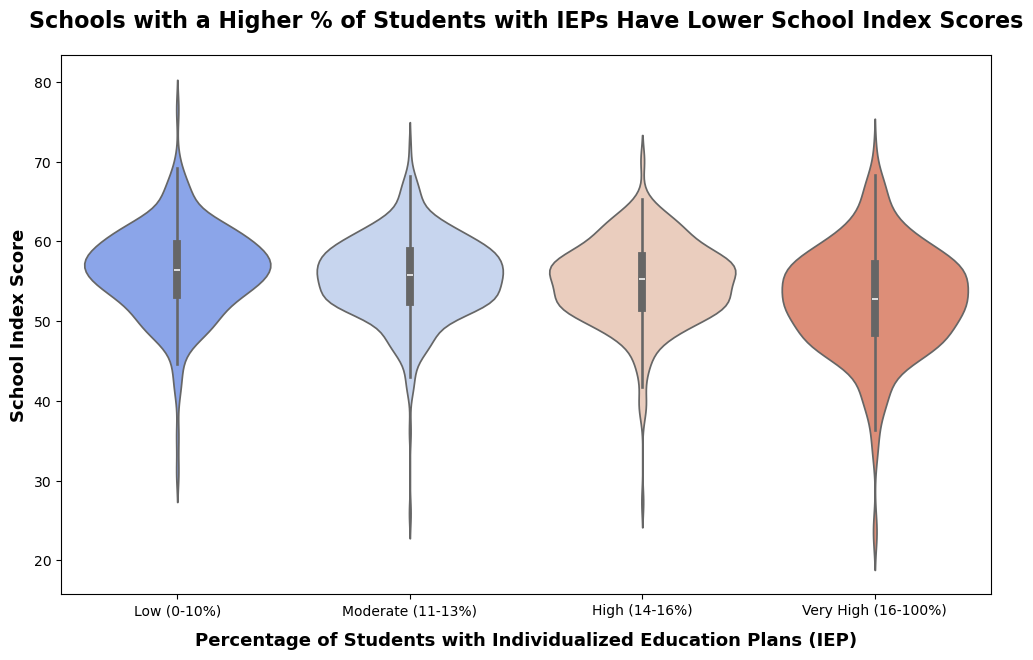

In [10]:
plt.figure(figsize=(12,7))

sns.violinplot(
    data=df_final,
    x="IEP_Group",       
    y="School_Index",    
    order=["Low (0-10%)","Moderate (11-13%)","High (14-16%)","Very High (16-100%)"],
    inner="box",         # Shows the median and quartile values inside the 'violin'
    palette="coolwarm"       
)

plt.title("Schools with a Higher % of Students with IEPs Have Lower School Index Scores", fontsize=16, fontweight="bold", pad =20)
plt.xlabel('Percentage of Students with Individualized Education Plans (IEP)', fontsize =13, fontweight="bold", labelpad=10)
plt.ylabel("School Index Score", fontsize= 13, fontweight = "bold")

plt.savefig("percent_iep.png", dpi=300, bbox_inches="tight")

plt.show()

## This suggests that while both socioeconomic status (as measured by %FRL) and having greater percentages of students with disabilities (%IEP) are associated with lower School Index scores, %FRL appears to have a stronger impact on school performance outcomes than %IEP, which is reinforced below.

In [11]:
df_final[["School_Index", "Percent_FRL", "Percent_IEP"]].corr()

,School_Index,Percent_FRL,Percent_IEP
School_Index,1.000000,-0.481821,-0.190325
Percent_FRL,-0.481821,1.000000,0.376803
Percent_IEP,-0.190325,0.376803,1.000000


## The dataframe above shows that there is a stronger negative correlation (-.48 vs -0.19) between the %FRL & School Index Value vs the % IEP & School Index Value

# Question 3: What is the distribution of school performance ratings in the state (i.e. “Exceptional”, “Needs Improvement”, etc.)?

### Getting a count of the number of schools in each category

In [12]:
rating_counts = df_final["School_Rating_Category"].value_counts()


In [13]:
print(rating_counts)

School_Rating_Category
Commendable          510
Acceptable           417
High Performing      155
Needs Improvement    147
Priority              45
Exceptional           21
Name: count, dtype: int64


## Finding percentage of each group vs the Total Number of Schools (1295 Schools for the 2022-2023 Reporting Year)

In [14]:
rating_percentages = df_final["School_Rating_Category"].value_counts(normalize=True) * 100

In [15]:
print(rating_percentages)

School_Rating_Category
Commendable          39.382239
Acceptable           32.200772
High Performing      11.969112
Needs Improvement    11.351351
Priority              3.474903
Exceptional           1.621622
Name: proportion, dtype: float64


## Creating two visualizations for this set. One that shows a Count Number of Schools (In Order of Increasing Rating) of each School Rating and another that uses a Pie Chart to show the proportions of each group relative to each other.

#### Setting the Order that the 'Bars' will display, so that they display in increasing order.

In [16]:
rating_order = [
    "Priority",
    "Needs Improvement",
    "Acceptable",
    "Commendable",
    "High Performing",
    "Exceptional"
]

/var/folders/lp/b3j3v6gx03g5m31fknpjvk640000gn/T/ipykernel_82013/4187565543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


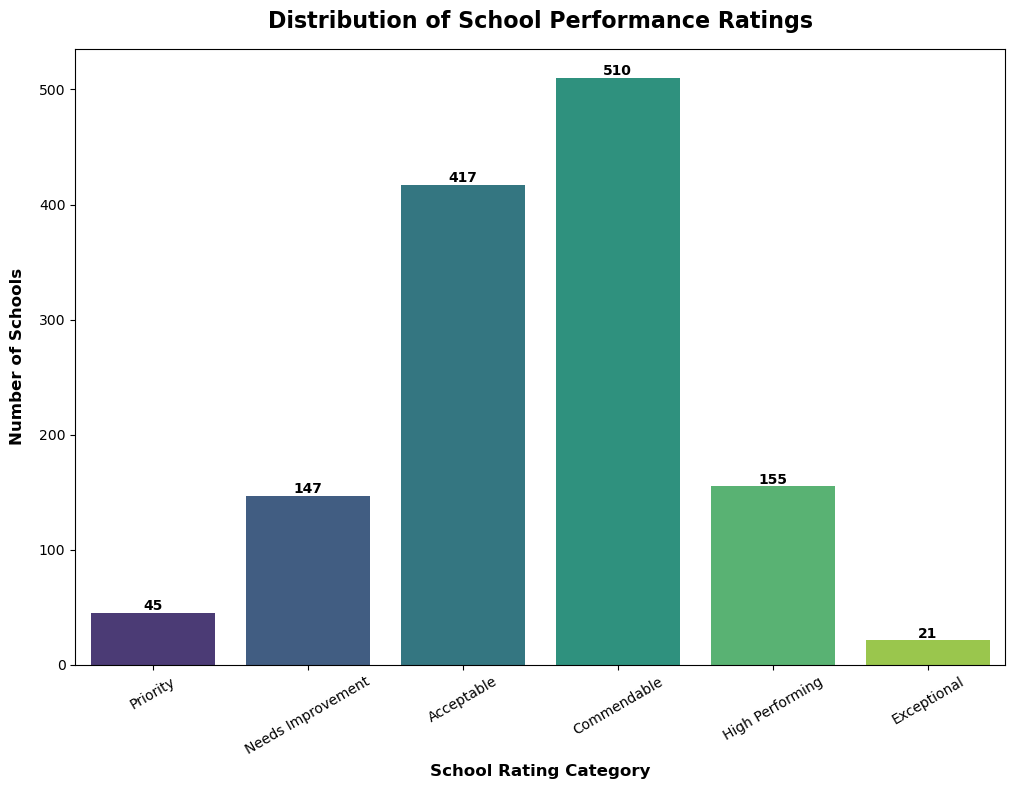

In [17]:
plt.figure(figsize=(12,8))
ax = sns.countplot(
    data=df_final,
    x="School_Rating_Category",
    order=rating_order,
    palette="viridis"
)

# Putting the tally of the count of the schools for each category
for container in ax.containers:
    ax.bar_label(container, fontsize=10, fontweight="bold")

plt.title("Distribution of School Performance Ratings", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("School Rating Category", labelpad=5, fontsize=12, fontweight="bold")
plt.ylabel("Number of Schools", labelpad=10, fontsize=12, fontweight="bold")
plt.xticks(rotation=30)

plt.savefig("dist_bargraph.png", dpi=300, bbox_inches="tight")

plt.show()

### The Pie Chart to show the Distribution based on the Percentage of the Total Number of Schools.

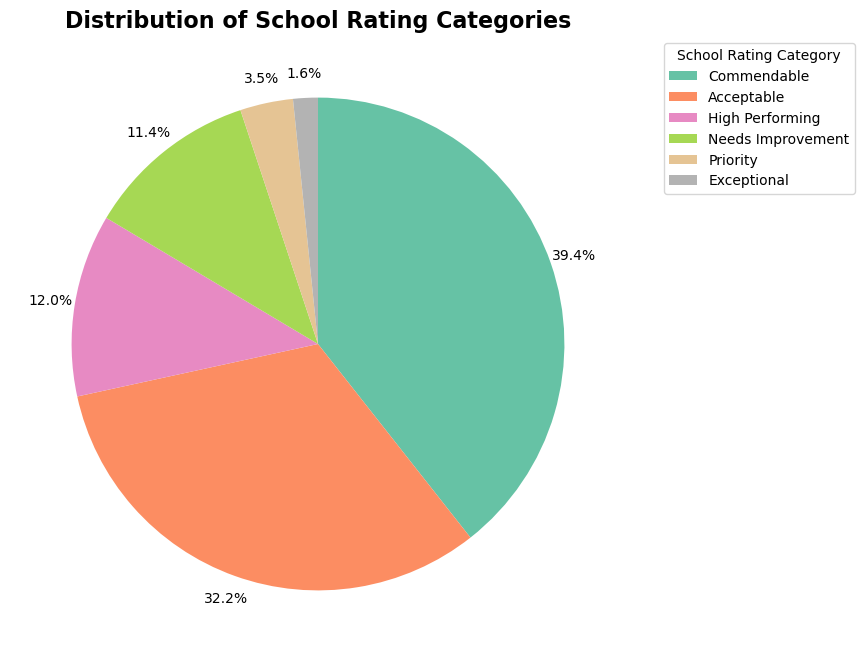

In [18]:
plt.figure(figsize=(8,8))
rating_counts.plot.pie(
    labels=None,                # Removing Labels, Using Legend instead
    autopct='%1.1f%%',          # Show percentages
    startangle=90,
    counterclock=False,
    colormap="Set2",
    pctdistance=1.1
)
# Creating a legend
plt.legend(
    rating_counts.index, 
    title="School Rating Category",
    bbox_to_anchor=(1.05, 1),   # positions the legend outside the chart
    loc='upper left'
)

plt.title("Distribution of School Rating Categories", fontsize=16, fontweight="bold")
plt.ylabel("")  # y-Label needed to be removed

plt.savefig("dist_pie_chart.png", dpi=300, bbox_inches="tight")

plt.show()

## Only 192 of schools have not earned a mark of at least 'Acceptable' of the 1295 schools from the 2022-2023 Reporting Year. Conversely, 176 of Iowa Schools are categorized as at least 'High Performing', which is an even smaller percentage.  

# Question 4: Is there variation across school levels (elementary, middle, high school) in how they perform on the school index when in the same school district?

In [19]:
district_level_index = df_final.groupby(["District_Code", "School_Type"])["School_Index"].mean().reset_index()
district_level_index.head()

,District_Code,School_Type,School_Index
0,9,Elementary,67.32
1,9,High,56.36
2,9,Middle,57.25
3,18,Elementary,58.61
4,18,Junior-High,58.16


#### Getting the value of the medians so those can be identified and overlay the Histogram plot

In [20]:
medians = df_final.groupby("School_Type")["School_Index"].median()

### Creating Faceted Histogram that Shows The Counts of each major School Type (Elementary, Middle, High) and the School Index Score.

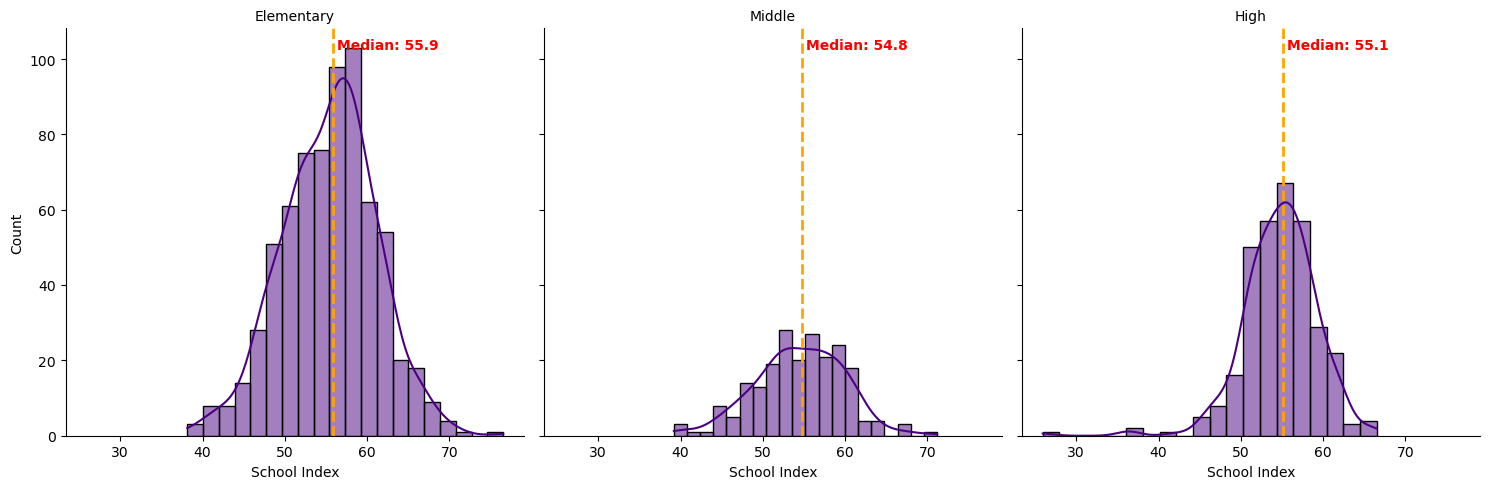

In [21]:
# Creating the faceted histograms
g = sns.FacetGrid(df_final, col="School_Type", 
                  col_order=["Elementary","Middle","High"], #Only using those three School_Types for this analysis
                  height=5, sharey=True)

# Add the information of what todata to enter into the Histogram plot as well as how that Histogram will look.
# Also adding KDE Curve to overlay histogram
g.map(sns.histplot, "School_Index", bins=20, kde=True, color="indigo")

# Adding median lines to the data and then adding the Index Score at that Median to be displayed
for ax, school_type in zip(g.axes.flat, ["Elementary","Middle","High"]):
    median_val = medians.loc[school_type]
    ax.axvline(median_val, color="orange", linestyle="--", linewidth=2)
    ax.text(median_val+0.5, ax.get_ylim()[1]*0.95,   # adjust placement
            f"Median: {median_val:.1f}", 
            color="red", fontsize=10, fontweight="bold")

# Adding Labels and Titles for the Histogram
g.set_axis_labels("School Index", "Count")
g.set_titles("{col_name}")

plt.savefig("school_type", dpi=300, bbox_inches="tight")

plt.show()


## This visualization shows that there are significantly more Elementary Schools than either Middle or High Schools in Iowa's Public School System. There is not a significant difference in terms of School Performance (as measured by School Index Score) across School Type